## Network Science Project 1
### Autumn 2022
### Due: November 4th, 1:00pm GMT

Please provide the following information:

Group number: 48

CID #1: 02035730

CID #2: 01862504

CID #3: 02023649


In [1]:
# Do not modify this cell or import any other modules
# without explicit permission. 
# You should run this cell before running the code below.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#You may also use scipy as needed

### Overview

When working on real-world problems, we often encounter *weighted* networks. In this assignment, you will work through a set of tasks using data for a weighted directed network where the nodes correspond to regions of the human brain with particular functions, and weighted links indicate the density of neuron fiber pathways between regions. You have been provided a file containing the network data which should be stored in the same folder as this notebook. Run the cell below to verify that you can load the graph.

In [82]:
import networkx as nx
g = nx.read_graphml('project1.graphml')
g = nx.convert_node_labels_to_integers(g)
print(type(g))
print("N=",g.number_of_nodes())
print("L=",g.number_of_edges())

<class 'networkx.classes.digraph.DiGraph'>
N= 872
L= 4036


The output from the cell above should indicate that g is a DiGraph with 872 nodes and 4036 links. 

Note that the label assigned to the edge weights in g is 'eweight'.

### Part 1: degree distributions (7 points)

For directed graphs, a node has two types of degrees, an in-degree ($k^{in}$) and an out-degree ($k^{out}$). For weighted graphs we have weighted versions of these degrees which can be computed as follows. Let $\rm W$ be the *weight matrix* for a directed network where $W_{ij}$ is the weight for the link pointing from node $j$ to node $i$. If no such link exists, then $W_{ij}=0$. The weighted in- and out-degrees for node $i$ can be computed using: 
$$\tilde k_i^{in} = \sum_{j=1}^N W_{ij}, $$
$$\tilde k_i^{out} = \sum_{j=1}^N W_{ji}. $$


1. Add code to the cell below to create a well-designed figure which shows the unweighted in- and out-degree distributions for the provided graph. Both distributions should be displayed on the same plot. Below the figure, provide a 1-paragraph explanation which: 1) describes one or more important differences between the two distributions and 2) explains what the difference(s) tells you about the graph structure. You should not focus on individual degree values but instead explain trends associated with a range (or ranges) of degrees. You should use your judgement to decide what is "important".

Note: *nx.degree_histogram* is unlikely to be helpful here, however the *np.unique* function with the *return_counts* option may be useful.

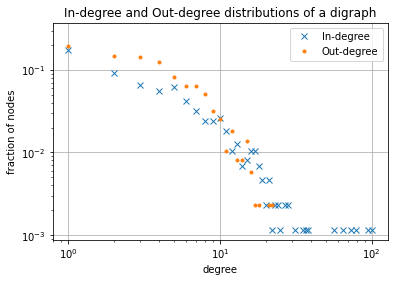

In [83]:
#Add code here

#GET indegree and outdegree of each node
indeg = np.array([g.in_degree(n) for n in range(g.order())])
outdeg = np.array([g.out_degree(n) for n in range(g.order())])

#Sorting & storing the frequency of degrees
indeg_val, indeg_count = np.unique(indeg, return_counts = True)
outdeg_val, outdeg_count = np.unique(outdeg, return_counts = True)

#Start with an array of zeros; for any index n, if n is a value in indeg_val then zeros[n] = indeg_count[n].
#Same principle applies to outdeg_val and outdeg_count.

N_in, N_out = np.max(indeg_val), np.max(outdeg_val)
in_0, out_0 = np.zeros(N_in+1), np.zeros(N_out+1)

indeg_dict = dict(zip(indeg_val,indeg_count))
outdeg_dict = dict(zip(outdeg_val,outdeg_count))

for x in range(N_in+1):
    if x in indeg_dict.keys():
        in_0[x] = indeg_dict[x]
    else:
        pass
    
for y in range(N_out+1):
    if y in outdeg_dict.keys():
        out_0[y] = outdeg_dict[y]
    else:
        pass

#Plotting figure

plt.figure(2)
plt.loglog(np.array(in_0)/np.sum(indeg_count),'x',label='In-degree')
plt.loglog(np.array(out_0)/np.sum(outdeg_count),'.',label='Out-degree')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.title('In-degree and Out-degree distributions of a digraph')
plt.legend()
plt.grid()
plt.show()

The in-degree and out-degree distributions are quite similar to each other. They both show a decreasing trend between the degree and proportion of nodes (with that degree value) between x = 10^0 and x = 10^1. The majority of nodes have in-degree/out-degree of less than 5. 

2. Now develop code to create a well-designed figure which shows the **weighted** in- and out-degree distributions. Carefully examine the figure and revisit your discussion from the previous question. Explain if/to what degree your conclusions for the unweighted degree distributions apply to the weighted distributions.

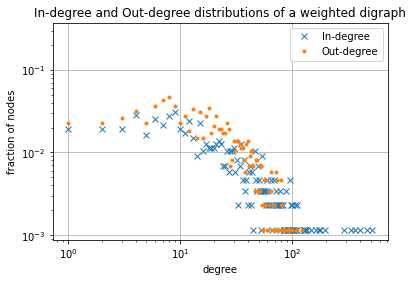

In [113]:
#Where is the weighted matrix W? Here we construct the weighted matrix. W_ij = Weight of edge from node j to node i
E = [e for e in g.edges]
W = np.zeros((g.order(),g.order()))
for x in E:
    OUT = x[0]
    IN = x[1]
    W[IN][OUT] = np.random.randint(1,10) #Set weight to distinguish from zero entries

    
#Same procedure as above
indeg2 = np.array([np.sum(W[i,:]) for i in range(g.order())])
outdeg2 = np.array([np.sum(W[:,o]) for o in range(g.order())])

indeg_val2, indeg_count2 = np.unique(indeg2, return_counts = True)
outdeg_val2, outdeg_count2 = np.unique(outdeg2, return_counts = True)

N_in2, N_out2 = int(np.max(indeg_val2)), int(np.max(outdeg_val2))
in_02, out_02 = np.zeros(N_in2+1), np.zeros(N_out2+1)

indeg_dict2 = dict(zip(indeg_val2,indeg_count2))
outdeg_dict2 = dict(zip(outdeg_val2,outdeg_count2))

for x in range(N_in2+1):
    if x in indeg_dict2.keys():
        in_02[x] = indeg_dict2[x]
    else:
        pass
    
for y in range(N_out2+1):
    if y in outdeg_dict2.keys():
        out_02[y] = outdeg_dict2[y]
    else:
        pass

#Plot Figure

plt.figure(2)
plt.loglog(np.array(in_02)/np.sum(indeg_count2),'x',label='In-degree')
plt.loglog(np.array(out_02)/np.sum(outdeg_count2),'.',label='Out-degree')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.title('In-degree and Out-degree distributions of a weighted digraph')
plt.legend()
plt.grid()
plt.show()

Again, the in-degree and the out-degree distributions are roughly similar to each other, showing a general decreasing trend (just like the distributions for the unweighted digraph). However, the distrbution of degrees is less positively skewed compared to the last graph.

### Part 2: centrality (9 points)

You will now develop your own code to compute the PageRank centrality. Recall that the PageRank centrality of node $i$ is typically given by: $$x_i = \sum_{j=1}^N\left[\left(1-m\right)\frac{A_{ij}}{max(k_j^{out},1)}x_j + \frac{m}{N}x_j\right],$$ where $\rm A$ is the adjacency matrix for a graph, $N$ is the number of nodes, and we will use $m=0.15$ throughout this assigment. 

1. Complete the function below to *efficiently* compute the PageRank centrality for the provided graph using the power method. Code for the initial guess for the centrality vector, $\textrm{y}^{(0)}$ has been provided. Let $\textrm{y}^{(i)}$ be the vector produced by the $i^{th}$ iteration of the power method with $i>0$. This vector should be normalized so that its maximum value is 1. There is no need to use any other normalization (e.g. based on the vector's magnitude). Let $d_j^{(i)}=|y_j^{(i)}-y_j^{(i-1)}|, j \in \left\{1,2,...,N\right\}$. The power method iterations should terminate when $max\left\{ d_1^{(i)}, d_2^{(i)}, ..., d_N^{(i)}\right\}<tol$ where *tol* is an input variable for the function.

You should think carefully about how to avoid unnecessary calculations and unnecessary loops. You may use numpy and scipy as needed. If using scipy, add the appropriate import statements to the cell below within the function. **Do not use or import any other modules for this question**. Your code should not use any variables created outside of the function other than those provided as input (A and tol). Below the function, provide a 2-3 sentence explanation of the main steps you have taken to make your code efficient.

In [302]:
def pageRank(A_0,tol=1e-8):
    """
    Compute PageRank centrality for N-node graph with adjacency matrix A

    Input:
    A: The adjacency matrix of the graph generated in the cell below
    tol: tolerance used to terminate iterations of power method
    
    Output:
    y: N-element numpy array containing the centrality vector

    Please do not modify the function input or the return statement below
    """
    import scipy.sparse as sp
    m = 0.15
    A = A_0.toarray()
    N = A.shape[0] #number of nodes
    
    y0 = np.random.rand(N) #initial trial vector
    new_xi_list = []
    
    x = np.zeros(N)
    new_xi_norm = y0
    i = 0 ## number of iterations
    
    while np.max(np.absolute(x - new_xi_norm)) >= tol: ## iterative loop
        x = new_xi_norm
        new_xi_list = []
        for i in range(N):
            SecondSum = (m/N) * np.sum(x) ## Treat second part of series on its own
            
            FirstSum = 0
            A_row_i = A[i,:]
            non_zero_ind = np.flatnonzero(A_row_i) ## For row i of A, only consider indices j where A_ij =/= 0.
            
            for j in non_zero_ind:
                col_j_sum = max(np.sum(A[:,j]),1)
                FirstSum += (1-m) * ((A[i][j]) / (col_j_sum)) * x[j] ## Find term on LHS for each j.
            
            new_xi_list.append(FirstSum + SecondSum) ## Combining LHS with RHS
            
        new_xi = np.array(new_xi_list)
        new_xi_norm = new_xi / np.max(new_xi_norm) ## Normalize
        i = i+1
        
    return(i, new_xi_norm)


In [303]:
#Code for calling pageRank function
A = nx.adjacency_matrix(g).T
x = pageRank(A,tol=1e-12)
print(x)

<ipython-input-303-9eb79c0e7df2>:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g).T


(872, array([0.00104207, 0.00104207, 0.00186096, 0.00570634, 0.00104207,
       0.00104207, 0.00259062, 0.0016827 , 0.00104207, 0.00133733,
       0.00318817, 0.00152531, 0.00154698, 0.00586329, 0.00148495,
       0.00712929, 0.00104207, 0.00104207, 0.0012464 , 0.00237072,
       0.00104207, 0.00104207, 0.00104207, 0.00225695, 0.00623745,
       0.00157266, 0.00126351, 0.00104207, 0.00104207, 0.00104207,
       0.00255218, 0.00133733, 0.00157086, 0.00148715, 0.00133733,
       0.00285025, 0.00173544, 0.00104207, 0.00158891, 0.00118416,
       0.00187384, 0.00104207, 0.00197226, 0.00170081, 0.018282  ,
       0.00118965, 0.00266571, 0.00104207, 0.00104207, 0.00104207,
       0.00224782, 0.0018557 , 0.00104207, 0.00179022, 0.00317075,
       0.00104207, 0.00347188, 0.00104207, 0.00149617, 0.00357453,
       0.00104207, 0.00350236, 0.00104207, 0.00339298, 0.00263353,
       0.00140166, 0.01407722, 0.00104207, 0.00110912, 0.00211635,
       0.00166382, 0.003371  , 0.00104207, 0.00386753, 0

I first splitted the series and considered finding both parts. The RHS is easy to compute because it only requires finding sum of entries of x since the multiplier m/N is constant. However, in order to find the LHS, note that the term = 0 if A_ij = 0. To save run time, I first found the indices {j_0, j_1 ...} of non-zero entries for row i of A, then compute the term individually for each j. Finally, the LHS can be computed by adding up all of these terms.



In [196]:
##Test Code. Please ignore
B = np.random.randint(-1,2,size=(10,10))
print(B)
Bsum = B.sum(axis = 1)
print(Bsum)
Bmax = np.where(Bsum<1, 1, Bsum)
V = np.tile(Bmax,(10,1))
print(Bmax)
print(V)

[[ 0 -1  1 -1  0  0  0 -1  0  1]
 [ 1  0  0  1  0 -1  1  1  1  1]
 [ 0 -1  0 -1 -1 -1 -1 -1 -1  0]
 [ 0  0 -1  0  0  1  1  0 -1 -1]
 [ 0 -1 -1 -1 -1  0 -1  0  1  0]
 [ 1  1  1 -1  1 -1  0  1  0  0]
 [-1  0  1 -1  1 -1  1  1  0 -1]
 [ 1  1  0  1  0  1 -1  0  0 -1]
 [ 0  0 -1 -1 -1  0  0  0  0 -1]
 [ 1  1 -1  0  0  1 -1  1 -1 -1]]
[-1  5 -7 -1 -4  3  0  2 -4  0]
[1 5 1 1 1 3 1 2 1 1]
[[1 5 1 1 1 3 1 2 1 1]
 [1 5 1 1 1 3 1 2 1 1]
 [1 5 1 1 1 3 1 2 1 1]
 [1 5 1 1 1 3 1 2 1 1]
 [1 5 1 1 1 3 1 2 1 1]
 [1 5 1 1 1 3 1 2 1 1]
 [1 5 1 1 1 3 1 2 1 1]
 [1 5 1 1 1 3 1 2 1 1]
 [1 5 1 1 1 3 1 2 1 1]
 [1 5 1 1 1 3 1 2 1 1]]


2. PageRank can be naturally modified for weighted graphs to:
$$\tilde{x}_i = \sum_{j=1}^N\left[\left(1-m\right)\frac{W_{ij}}{max(\tilde{k}_j^{out},1)}\tilde{x}_j + \frac{m}{N}\tilde{x}_j\right],$$

Complete the function below to efficiently compute this modified PageRank centrality for the nodes in the provided graph using the power method. The same guidance and restrictions from the previous question apply here as well. It is completely fine to reuse code from your pageRank function above as needed. 

In [446]:
def pageRankW(W,tol=1e-8):
    """
    Compute Weighted PageRank centrality for N-node graph with weight matrix W

    Input:
    W: The weight matrix of the graph generated in the cell below
    tol: tolerance used to terminate iterations of power method
    
    Output:
    y: N-element numpy array containing the centrality vector
    
    Please do not modify the function input or the return statement below
    """
    import scipy.sparse as sp
    m=0.15
    N = A.shape[0] #number of nodes
    
    y0 = np.random.rand(N) #initial trial vector
    
    return pageRank(W,tol)

In [447]:
#Code for calling pageRank function
W = nx.adjacency_matrix(g,weight='eweight').T
x_tilde = pageRankW(W,tol=1e-12)
print(x_tilde)

<ipython-input-447-19a31b6cb778>:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(g,weight='eweight').T


(872, array([0.00116859, 0.00116859, 0.0018068 , ..., 0.3362954 , 1.        ,
       0.91842205]))


*No discussion of pageRankW function is needed*

3. Examine your results for the centralities, and compare the ten most important nodes as ranked by (1) the unweighted in-degree centrality, (2) the unweighted PageRank centrality, and (3) the weighted PageRank centrality. Add code to the cell below to support your comparison. Provide a brief non-technical description of how much agreement there is between (1) and (2) and between (2) and 3). Your code may generate 1-2 figures, simply print out lists of the most important nodes, or do something else that is comparably useful.

<ipython-input-486-7e2c1decb554>:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g).T


Centralities of ten most important nodes

Unweighted Degree Centrality:
[1.         0.94059406 0.78217822 0.72277228 0.64356436 0.55445545
 0.37623762 0.36633663 0.34653465 0.30693069]
Unweighted PageRank Centrality:
[1.         0.89084757 0.22235343 0.21378362 0.19004249 0.18547498
 0.17282839 0.14059149 0.0907469  0.09070454]
Weighted PageRank Centrality:
[1.         0.91842205 0.3362954  0.33607258 0.28701968 0.2064415
 0.20598779 0.13260977 0.10576698 0.09556279]


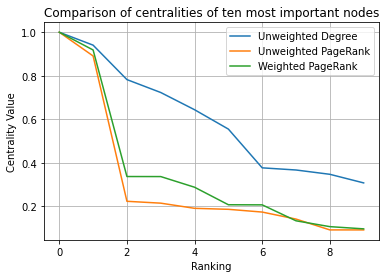

Indices of ten most important nodes

Unweighted Degree Centrality:
[866, 431, 430, 865, 869, 434, 143, 569, 864, 429]
Unweighted PageRank Centrality:
[870, 871, 869, 866, 862, 864, 434, 867, 865, 431]
Weighted PageRank Centrality:
[870, 871, 869, 866, 862, 434, 864, 431, 432, 865]


In [486]:
import matplotlib.pyplot as plt

#Code for Degree Centrality
np.set_printoptions(threshold=100)
A = nx.adjacency_matrix(g).T
li = []
for k in range(A.shape[0]):
    li.append(np.sum(A.A[k,:]))
li = li / max(li)
arr = np.asarray(li)

#Finding top ten
top10_1 = np.flip(np.sort(arr)[-10:])
top10_2 = np.flip(np.sort(x[1])[-10:])
top10_3 = np.flip(np.sort(x_tilde[1])[-10:])

print("Centralities of ten most important nodes")
print("")
print("Unweighted Degree Centrality:")
print(top10_1)
print("Unweighted PageRank Centrality:")
print(top10_2)
print("Weighted PageRank Centrality:")
print(top10_3)

##plot graph comparing centralities of top 10 nodes
plt.figure(3)
plt.plot(top10_1,label='Unweighted Degree')
plt.plot(top10_2,label='Unweighted PageRank')
plt.plot(top10_3,label='Weighted PageRank')
plt.xlabel('Ranking')
plt.ylabel('Centrality Value')
plt.title('Comparison of centralities of ten most important nodes')
plt.legend()
plt.grid()
plt.show()

top10_1_ind = []
top10_2_ind = []
top10_3_ind = []

##Finding indices of nodes containing top ten centrality values
for i in range(10):
    top10_1_ind.append(np.where(arr==top10_1[i])[0][0])
    top10_2_ind.append(np.where(x[1]==top10_2[i])[0][0])
    top10_3_ind.append(np.where(x_tilde[1]==top10_3[i])[0][0])

print("Indices of ten most important nodes")
print("")    
print("Unweighted Degree Centrality:")
print(top10_1_ind)
print("Unweighted PageRank Centrality:")
print(top10_2_ind)
print("Weighted PageRank Centrality:")
print(top10_3_ind)
    
    

For sake of simplicity, we refer to
(1) as top 10 in Unweighted Degree Centrality
(2) as top 10 in Unweighted PageRank Centrality
(3) as top 10 in Weighted PageRank Centrality

The distribution for the values in (2),(3) are more heavily skewed compared to that of (1). Furthermore, the rankings for the ten most important nodes are different. For example, whilst both (2) and (3) agree that Node 870 is the most important, it does not even appear in (1). Furthermore, (1) establishes that Node 430 is the third most important, but it doesn't appear in (2) and (3) either. In conclusion, it is evident that (1) is drastically different from (2) and (3).

However, there are similarities between (2) and (3). In fact, the rankings in (2) and (3) are identical. Furthermore, there are 9 nodes which is within both (2) and (3), albeit in a slightly different order. Nevertheless it is clear that (2) and (3) mostly agree with each other.

### Part 3: Visualizing a random person's brain network (4 points)

Create a well-designed figure displaying the 100 most important nodes in the brain network and the links connecting these nodes with each other. You may use the centrality of your choice to decide which nodes are the most important. The node sizes in your figure should be set so that larger sizes correspond to more important nodes. You do not need to include node labels, edge weights, or use the edge weights to modify the displayed links.


<ipython-input-610-001e57a48922>:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A_GG = nx.adjacency_matrix(GG).T


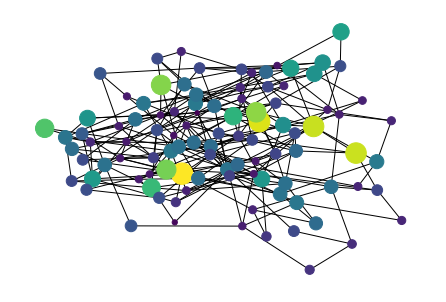

In [610]:
import random

GG = nx.gnp_random_graph(400,0.025) ## Create new network

A_GG = nx.adjacency_matrix(GG).T
x_GG = pageRank(A_GG,tol=1e-12) 

top100_GG = np.flip(np.sort(x_GG[1])[-100:]) ## Find top hundred most important nodes by unweighted PageRank

top100_GG_ind = []
for i in range(100):
    top100_GG_ind.append(np.where(x_GG[1]==top100_GG[i])[0][0])
    
## Remove nodes not in Top 100 from the graph
Nodes = np.asarray(list(GG.nodes()))
TOP100 = np.asarray(top100_GG_ind)
NOTTOP100 = np.delete(Nodes, TOP100) 

for x in NOTTOP100:
    GG.remove_node(x)


## Adjustment to node size for easier visibility
top100_GG_Norm = ((top100_GG - np.mean(top100_GG))/np.std(top100_GG))*100 + 150 

## Plot graph; Darker in colour - less important; Brighter in colour - more important
plt.figure(1) 
nx.draw_spring(GG, nodelist=TOP100, node_size = top100_GG_Norm, node_color = top100_GG) 

**Note:** If you are curious about the neuroscience aspect of this assignment, you can extract information about each graph node as in the cell below. However, note that the original graph has been "adjusted" a little to make it suitable for this assignment. This is just "extra" information and is not needed to complete the assignment.

In [ ]:
print(g.nodes)

### Further guidance

* Your group should submit both a completed Jupyter notebook and *either* a pdf version or html version of the notebook (generated using File --- Download as). If you cannot generate a pdf, try installing latex first, or submit an html version instead. Each group should make a single submission.
    To submit your assignment, go to the Project 1 item on the module Blackboard page. There will be an option to attach your completed Jupyter notebook and pdf/html file to your submission. (these should be named *project1_groupx.ipynb* and *project1_groupx.pdf* or *project1_groupx.html* where x is your group number). 
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed **except** for part 2, questions 1 and 2. Please do not use any other packages without explicit permission.
* Marking will be based on the correctness of your work, the efficiency of your codes for part 2, questions 1 and 2, and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment. 
* This assignment requires sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor. 
* Questions about the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or during a problem class.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term.
